# Credit Card Fraud Detection

## Project Overview

In the era of digital commerce, the prevalence of credit card transactions has surged exponentially, accompanied by a proportional rise in fraudulent activities. Safeguarding financial systems from such fraudulent endeavors is paramount, requiring robust and innovative techniques in anomaly and fraud detection.

This project addresses this pressing challenge through a dual-pronged approach leveraging cutting-edge machine learning algorithms: Isolation Forest and Autoencoder. By synergizing the strengths of these methodologies, our endeavor aims to fortify fraud detection systems and minimize financial risks for both consumers and businesses.

The dataset is comprised of credit card transactions made by European cardholders in September 2013. Within this dataset, we are confronted with the stark reality of fraud: amidst 284,807 transactions spanning two days, a mere 492 transactions are labeled as fraudulent. This stark class imbalance underscores the formidable challenge that lies ahead, with fraudulent transactions constituting a mere 0.172% of the entire dataset. The dataset's composition is further compounded by the absence of categorical variables, with only numerical input variables derived from a Principal Component Analysis (PCA) transformation. While this transformation obscures the original features due to confidentiality concerns, it imbues the dataset with a rich tapestry of numerical attributes encapsulating transactional nuances. The principal components (V1-V28) extracted through PCA are augmented by two non-transformed features: 'Time', denoting the seconds elapsed since the first transaction, and 'Amount', signifying the transactional value. Notably, the 'Amount' feature assumes a pivotal role, offering insights into cost-sensitive learning strategies.

The Isolation Forest algorithm serves as the vanguard in our anomaly detection strategy. Its innate ability to efficiently isolate anomalies within high-dimensional data spaces makes it an ideal candidate for detecting irregular patterns indicative of fraudulent transactions. By harnessing the principle of isolating anomalies based on their intrinsic properties, the Isolation Forest method excels in swiftly identifying fraudulent transactions while minimizing false positives.

Complementing the Isolation Forest, the Autoencoder steps in as a potent tool for fraud detection by reconstructing input data and discerning deviations from normal transactional behaviors. This neural network architecture is adept at capturing intricate patterns and nuances within transactional data, thereby empowering our system to discern even the most subtle anomalies indicative of fraudulent activities.

Through this project, we aspire to contribute to the ongoing efforts in bolstering financial security frameworks by presenting a comprehensive methodology that amalgamates the prowess of isolation-based anomaly detection and autoencoder-driven fraud detection. By delineating fraudulent transactions with precision and efficiency, our approach endeavors to foster trust, resilience, and integrity within the dynamic landscape of digital commerce.

## Exploratory Data Analysis

### Inspect the Data

In [1]:
import numpy as np
import pandas as pd
import keras
from keras import layers
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest

In [2]:
file_path = '/Users/alyso/Downloads/archive/creditcard.csv'
data = pd.read_csv(file_path)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
print ("Fraud")
print (data.Time[data.Class == 1].describe())
print ()
print ("Normal")
print (data.Time[data.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


### Visualize the Data

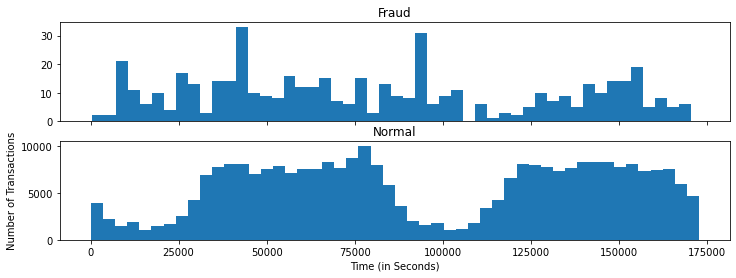

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(data.Time[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.Time[data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

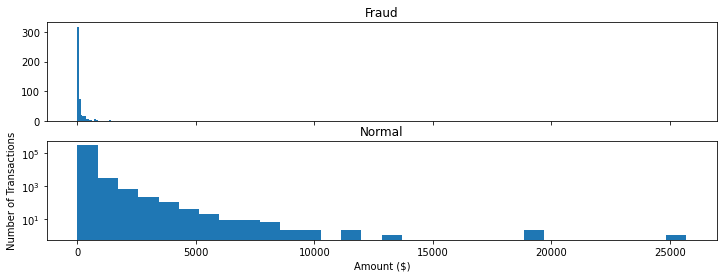

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(data.Amount[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.Amount[data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [9]:
data['Amount_max_fraud'] = 1
data.loc[data.Amount <= 2125.87, 'Amount_max_fraud'] = 0

In [10]:
#Select only the anonymized features.
v_features = data.iloc[:,1:29].columns

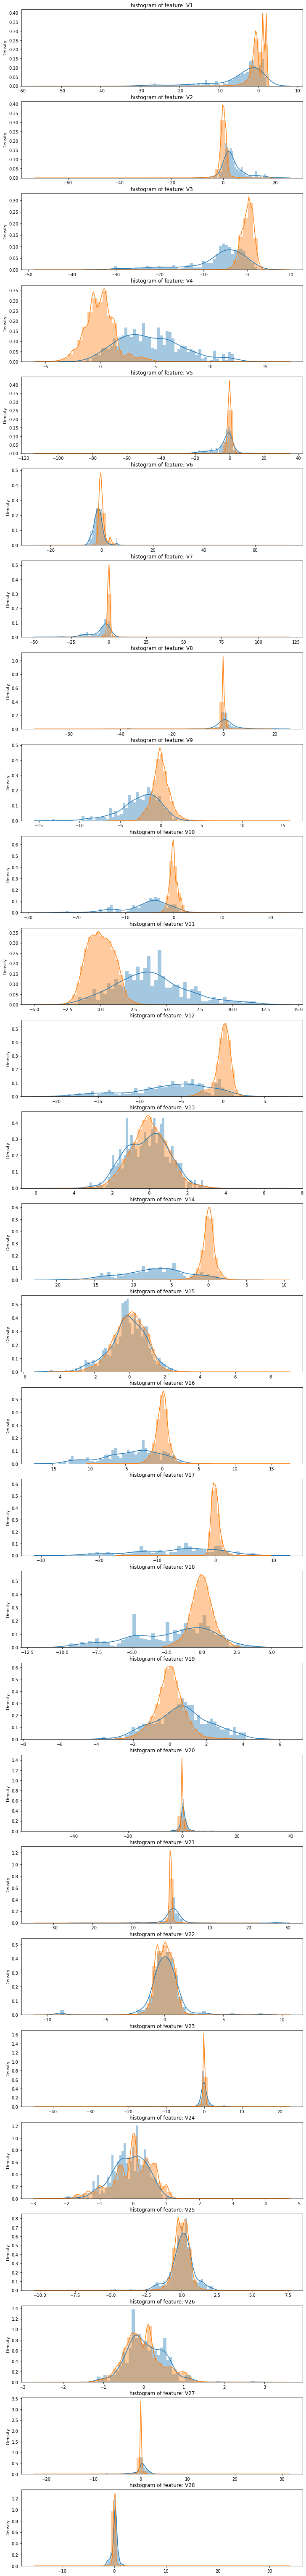

In [11]:
import warnings

# Suppress deprecated warnings
warnings.filterwarnings("ignore", category=FutureWarning)


plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data.Class == 1], bins=50)
    sns.distplot(data[cn][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

### Clean the Data

In [12]:
#Drop all of the features that have very similar distributions between the two types of transactions.
data = data.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

In [13]:
# Splitting the dataset into features and target variable
X = data.drop(['Time', 'Class'], axis=1)  # Drop Time and Class columns
y = data['Class']  # Target variable (fraud or not fraud)

In [14]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Repeat creating sets to use to Anomaly Detection
X_tr, X_te, y_tr, y_te = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Anomaly Detections

Isolation Forest is an algorithm know for its performance in anomaly detection in high-dimensional datasets.
Here's an overview of how Isolation Forest works:

- Random Subsampling: Isolation Forest starts by randomly selecting a subset of data points from the dataset. This random subsampling allows for efficient and scalable anomaly detection, especially in large datasets.
- Recursive Partitioning: Next, Isolation Forest employs a recursive partitioning strategy to isolate anomalies. Each decision tree in the forest is built by selecting a random feature and a random split value within the range of the selected feature. This process continues recursively until each data point is isolated into its own leaf node.
- Path Length Estimation: Anomalies are identified based on the average path length required to isolate them in the decision trees. Intuitively, anomalies are expected to have shorter path lengths compared to normal data points since they require fewer splits to be isolated. By measuring the average path length for each data point across multiple trees, Isolation Forest effectively distinguishes anomalies from normal instances.
- Anomaly Score Calculation: The anomaly score for each data point is calculated based on its average path length across all decision trees in the forest. Lower anomaly scores indicate a higher likelihood of being an anomaly, while higher scores suggest normalcy.
- Thresholding: Finally, a threshold is applied to the anomaly scores to classify data points as either anomalies or normal instances. This threshold can be determined based on domain knowledge or through optimization techniques to achieve the desired balance between false positives and false negatives.

In [16]:
# Training the Isolation Forest model
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.01, random_state=42)
model.fit(X_tr)

# Predicting on the training set
y_pred_train = model.predict(X_tr)
y_pred_train[y_pred_train == 1] = 0  # Inliers are labeled as 1, so change to 0
y_pred_train[y_pred_train == -1] = 1  # Outliers are labeled as -1, so change to 1

# Predicting on the test set
y_pred_test = model.predict(X_te)
y_pred_test[y_pred_test == 1] = 0
y_pred_test[y_pred_test == -1] = 1

# Evaluating the model
print("Training Set:")
print(confusion_matrix(y_tr, y_pred_train))
print(classification_report(y_tr, y_pred_train))

print("Testing Set:")
print(confusion_matrix(y_te, y_pred_test))
print(classification_report(y_te, y_pred_test))

Training Set:
[[225442   2009]
 [   124    270]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.12      0.69      0.20       394

    accuracy                           0.99    227845
   macro avg       0.56      0.84      0.60    227845
weighted avg       1.00      0.99      0.99    227845

Testing Set:
[[56345   519]
 [   29    69]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.12      0.70      0.20        98

    accuracy                           0.99     56962
   macro avg       0.56      0.85      0.60     56962
weighted avg       1.00      0.99      0.99     56962



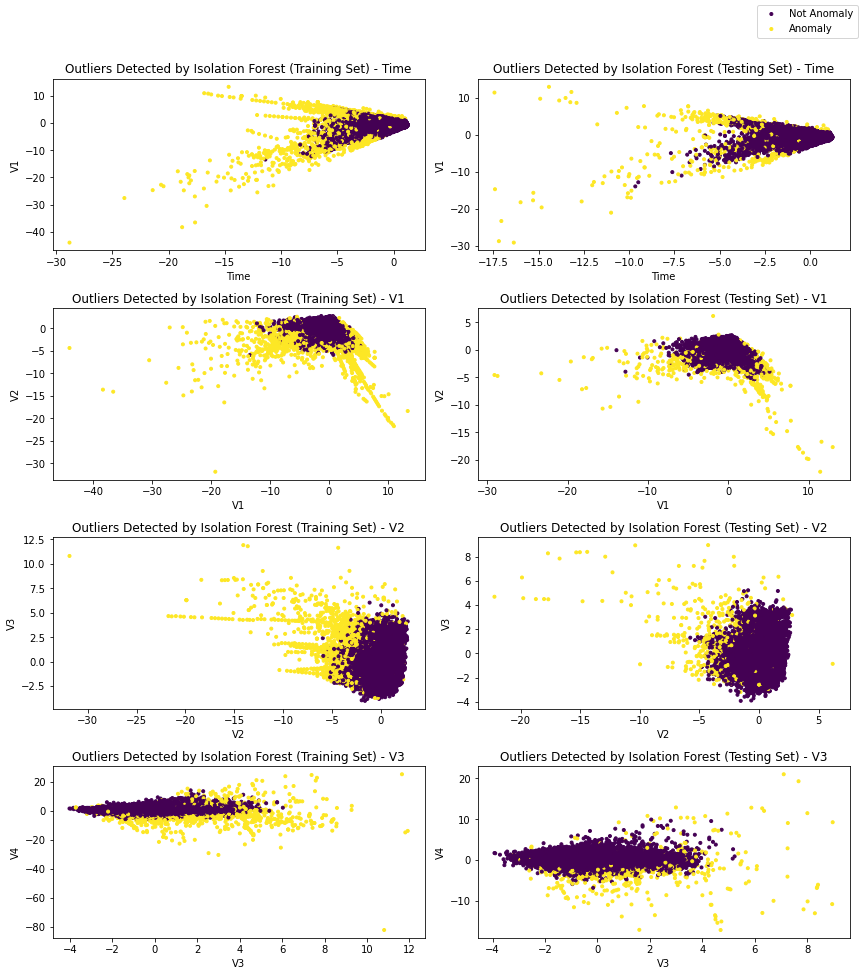

In [18]:
# Define features to visualize (adjust to see different features)
features = ['Time', 'V1', 'V2', 'V3', 'V4']

# Create subplots for each feature
fig, axes = plt.subplots(nrows=len(features)-1, ncols=2, figsize=(12, 14))

# Visualizing outliers on the training set
for i, feature in enumerate(features[:-1]):
    scatter_train = axes[i, 0].scatter(X_tr[:, i], X_tr[:, i + 1], c=y_pred_train, cmap='viridis', marker='.')
    axes[i, 0].set_title(f'Outliers Detected by Isolation Forest (Training Set) - {feature}')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel(features[i + 1])

# Visualizing outliers on the testing set
for i, feature in enumerate(features[:-1]):
    scatter_test = axes[i, 1].scatter(X_te[:, i], X_te[:, i + 1], c=y_pred_test, cmap='viridis', marker='.')
    axes[i, 1].set_title(f'Outliers Detected by Isolation Forest (Testing Set) - {feature}')
    axes[i, 1].set_xlabel(feature)
    axes[i, 1].set_ylabel(features[i + 1])

# Add legend for outlier prediction
fig.legend(['Not Anomaly', 'Anomaly'], loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout
plt.show()


Here, we can see that the Isolation Forest identified many anomalies. Since this dataset is labeled with fraud and not anomaly status, this is an unsupervised learning technique. We can see that in general the anomalies (yellow points) are more sparse across many of the features. Let's move forward and perform fraud detection using an autoencoder model

## Model Architecture

Autoencoders are a type of neural network architecture commonly used for unsupervised learning tasks, particularly in tasks involving data reconstruction and dimensionality reduction. They consist of an encoder and a decoder component, working together to learn a compressed representation of input data and then reconstruct it as faithfully as possible. Here's an overview of how autoencoders work and an explanation of the architecture provided:

- Encoder: The encoder component of an autoencoder takes the input data and learns a compressed representation, also known as a latent space or encoding, which captures the most salient features of the input data. This compressed representation typically has a lower dimensionality than the original input data.
- Decoder: The decoder component takes the compressed representation learned by the encoder and attempts to reconstruct the original input data from this representation. The goal of the decoder is to generate output data that closely resembles the input data, thereby minimizing the reconstruction error.
- Training: During training, the autoencoder learns to minimize the difference between the input data and the reconstructed data. This is typically achieved by optimizing a loss function, such as mean squared error (MSE), which quantifies the discrepancy between the input and reconstructed data.


**Architecture**:
- Input Layer: The input layer defines the shape of the input data. In the provided architecture, the input shape is determined by the number of features in the input data (X_train.shape[1]), where X_train is the training data.
- Encoder Layers: The encoder layers gradually reduce the dimensionality of the input data, capturing its essential features. In the provided architecture, there are two dense layers (Dense) with 16 and 8 units respectively, both activated by the Rectified Linear Unit (ReLU) activation function. ReLU is commonly used in neural networks to introduce non-linearity.
- Latent Space: The layer with 8 units represents the compressed representation or latent space learned by the encoder. It captures the most important features of the input data in a lower-dimensional space.
- Decoder Layers: The decoder layers mirror the structure of the encoder layers but in reverse order. These layers aim to reconstruct the original input data from the compressed representation. In the provided architecture, there is one dense layer with 16 units activated by ReLU, followed by a dense layer with the same number of units as the input data, activated by the linear activation function.
- Output Layer: The output layer produces the reconstructed data. It has the same shape as the input data and uses the linear activation function to ensure that the output values can range over the entire real number space.


Overall, this autoencoder architecture learns to compress the input data into a lower-dimensional latent space and then reconstruct it as faithfully as possible, effectively capturing the underlying structure of the data while minimizing reconstruction error. <br>

In [19]:
# Define the autoencoder model
model = Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(X_train.shape[1], activation='linear')
])

c:\Users\alyso\anaconda3\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [20]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
# Train the autoencoder
history = model.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, validation_split=0.1)

Epoch 1/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 546us/step - loss: 0.6206 - val_loss: 0.3756
Epoch 2/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 545us/step - loss: 0.3685 - val_loss: 0.3303
Epoch 3/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 3s 538us/step - loss: 0.3282 - val_loss: 0.3190
Epoch 4/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 3s 527us/step - loss: 0.3171 - val_loss: 0.3266
Epoch 5/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 3s 528us/step - loss: 0.3088 - val_loss: 0.3019
Epoch 6/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 543us/step - loss: 0.3085 - val_loss: 0.2784
Epoch 7/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 3s 535us/step - loss: 0.2843 - val_loss: 0.2669
Epoch 8/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 3s 528us/step - loss: 0.2748 - val_loss: 0.2550
Epoch 9/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 3s 530us/step - loss: 0.2598 - val_loss: 0.2595
Epoch 10/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 3s 528us/step - loss: 0.2612 - val_loss: 0.2496


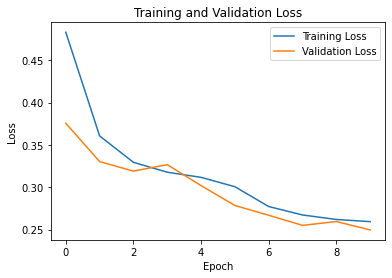

In [22]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
# Reconstruct the input data
reconstructed_data = model.predict(X_scaled)

# Calculate the reconstruction error
mse = np.mean(np.power(X_scaled - reconstructed_data, 2), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 95)  # 95th percentile of the reconstruction error

# Predict anomalies
y_pred = (mse > threshold).astype(int)

# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 4s 424us/step
[[270406  13909]
 [   160    332]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    284315
           1       0.02      0.67      0.05       492

    accuracy                           0.95    284807
   macro avg       0.51      0.81      0.51    284807
weighted avg       1.00      0.95      0.97    284807



In [24]:
# Calculate metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame()

model_results = pd.DataFrame({
    'Model': ['model_1'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1]
})

results_df = results_df.append(model_results, ignore_index=True)

In [25]:
print(results_df)

     Model  Accuracy  Precision    Recall  F1-Score
0  model_1  0.950602   0.023313  0.674797  0.045069


### Iterate on the model

In [26]:
# Define the autoencoder model with dropout layers
model = Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(X_train.shape[1], activation='linear')
])

c:\Users\alyso\anaconda3\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [27]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
# Train the autoencoder
history = model.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, validation_split=0.1)

Epoch 1/10


6409/6409 ━━━━━━━━━━━━━━━━━━━━ 5s 657us/step - loss: 0.5146 - val_loss: 0.1401
Epoch 2/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 627us/step - loss: 0.3054 - val_loss: 0.1298
Epoch 3/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 647us/step - loss: 0.2905 - val_loss: 0.1112
Epoch 4/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 637us/step - loss: 0.2821 - val_loss: 0.1180
Epoch 5/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 689us/step - loss: 0.2799 - val_loss: 0.1036
Epoch 6/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 653us/step - loss: 0.2823 - val_loss: 0.1117
Epoch 7/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 641us/step - loss: 0.2635 - val_loss: 0.1120
Epoch 8/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 648us/step - loss: 0.2660 - val_loss: 0.1113
Epoch 9/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 652us/step - loss: 0.2630 - val_loss: 0.1038
Epoch 10/10
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 655us/step - loss: 0.2587 - val_loss: 0.1147


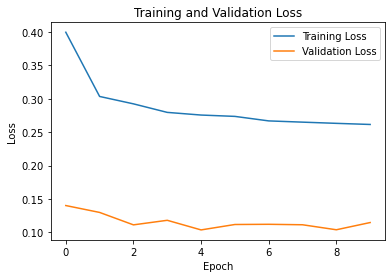

In [29]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
# Reconstruct the input data
reconstructed_data = model.predict(X_scaled)

# Calculate the reconstruction error
mse = np.mean(np.power(X_scaled - reconstructed_data, 2), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 95)  # 95th percentile of the reconstruction error

# Predict anomalies
y_pred = (mse > threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

model_results = pd.DataFrame({
    'Model': ['model_2'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1]
})

results_df = results_df.append(model_results, ignore_index=True)
print(results_df)


8901/8901 ━━━━━━━━━━━━━━━━━━━━ 4s 434us/step
     Model  Accuracy  Precision    Recall  F1-Score
0  model_1  0.950602   0.023313  0.674797  0.045069
1  model_2  0.951353   0.030826  0.892276  0.059594


In [31]:
# Repeat with more epochs
# Train the autoencoder
history = model.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_split=0.1)

Epoch 1/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 646us/step - loss: 0.2625 - val_loss: 0.1058
Epoch 2/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 636us/step - loss: 0.2587 - val_loss: 0.1096
Epoch 3/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 644us/step - loss: 0.2602 - val_loss: 0.0980
Epoch 4/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 646us/step - loss: 0.2654 - val_loss: 0.0982
Epoch 5/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 644us/step - loss: 0.2621 - val_loss: 0.0947
Epoch 6/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 665us/step - loss: 0.2598 - val_loss: 0.1082
Epoch 7/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 657us/step - loss: 0.2649 - val_loss: 0.1002
Epoch 8/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 657us/step - loss: 0.2571 - val_loss: 0.1115
Epoch 9/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 644us/step - loss: 0.2584 - val_loss: 0.0991
Epoch 10/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 657us/step - loss: 0.2517 - val_loss: 0.1106
Epoch 11/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 4s 659us/step - loss: 0.2512 - val_loss: 0.1042
Epoch 12

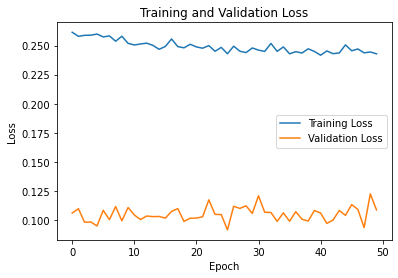

In [32]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
# Reconstruct the input data
reconstructed_data = model.predict(X_scaled)

# Calculate the reconstruction error
mse = np.mean(np.power(X_scaled - reconstructed_data, 2), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 95)  # 95th percentile of the reconstruction error

# Predict anomalies
y_pred = (mse > threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

model_results = pd.DataFrame({
    'Model': ['model_3'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1]
})

results_df = results_df.append(model_results, ignore_index=True)
print(results_df)


8901/8901 ━━━━━━━━━━━━━━━━━━━━ 4s 440us/step
     Model  Accuracy  Precision    Recall  F1-Score
0  model_1  0.950602   0.023313  0.674797  0.045069
1  model_2  0.951353   0.030826  0.892276  0.059594
2  model_3  0.951290   0.030195  0.873984  0.058372


In [34]:
# Repeat with reduced batch size
# Train the autoencoder
history = model.fit(X_train, X_train, epochs=10, batch_size=16, shuffle=True, validation_split=0.1)

Epoch 1/10
12817/12817 ━━━━━━━━━━━━━━━━━━━━ 8s 646us/step - loss: 0.2531 - val_loss: 0.1176
Epoch 2/10
12817/12817 ━━━━━━━━━━━━━━━━━━━━ 8s 644us/step - loss: 0.2575 - val_loss: 0.1097
Epoch 3/10
12817/12817 ━━━━━━━━━━━━━━━━━━━━ 9s 664us/step - loss: 0.2522 - val_loss: 0.1058
Epoch 4/10
12817/12817 ━━━━━━━━━━━━━━━━━━━━ 8s 645us/step - loss: 0.2493 - val_loss: 0.1029
Epoch 5/10
12817/12817 ━━━━━━━━━━━━━━━━━━━━ 8s 630us/step - loss: 0.2538 - val_loss: 0.1059
Epoch 6/10
12817/12817 ━━━━━━━━━━━━━━━━━━━━ 8s 631us/step - loss: 0.2523 - val_loss: 0.1090
Epoch 7/10
12817/12817 ━━━━━━━━━━━━━━━━━━━━ 8s 637us/step - loss: 0.2583 - val_loss: 0.1123
Epoch 8/10
12817/12817 ━━━━━━━━━━━━━━━━━━━━ 8s 637us/step - loss: 0.2530 - val_loss: 0.1127
Epoch 9/10
12817/12817 ━━━━━━━━━━━━━━━━━━━━ 8s 636us/step - loss: 0.2586 - val_loss: 0.1218
Epoch 10/10
12817/12817 ━━━━━━━━━━━━━━━━━━━━ 8s 638us/step - loss: 0.2618 - val_loss: 0.1030


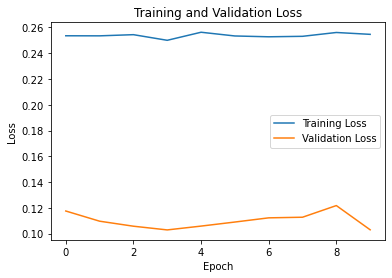

In [35]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
# Reconstruct the input data
reconstructed_data = model.predict(X_scaled)

# Calculate the reconstruction error
mse = np.mean(np.power(X_scaled - reconstructed_data, 2), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 95)  # 95th percentile of the reconstruction error

# Predict anomalies
y_pred = (mse > threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

model_results = pd.DataFrame({
    'Model': ['model_4'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1]
})

results_df = results_df.append(model_results, ignore_index=True)
print(results_df)


8901/8901 ━━━━━━━━━━━━━━━━━━━━ 4s 431us/step
     Model  Accuracy  Precision    Recall  F1-Score
0  model_1  0.950602   0.023313  0.674797  0.045069
1  model_2  0.951353   0.030826  0.892276  0.059594
2  model_3  0.951290   0.030195  0.873984  0.058372
3  model_4  0.951311   0.030405  0.880081  0.058780


## Results and Analysis


Anomaly detection and fraud detection are both vital components of cybersecurity and risk management systems, but they differ in their objectives, methodologies, and applications.

**Objectives**:
- Anomaly Detection: Anomaly detection aims to identify instances or patterns in data that deviate significantly from the norm or expected behavior. These anomalies may be indicative of errors, outliers, or novel events that warrant further investigation. Anomaly detection is a broad task applicable to various domains, including network security, system monitoring, and industrial quality control.
- Fraud Detection: Fraud detection specifically targets the identification of malicious or fraudulent activities within a system or dataset. Unlike general anomalies, fraudulent behavior is typically intentional and may involve deception, manipulation, or unauthorized access. Fraud detection focuses on safeguarding against financial losses, protecting sensitive information, and maintaining trust in online transactions and services.


**Methodologies**:
- Anomaly Detection: Anomaly detection employs diverse methodologies, including statistical techniques, machine learning algorithms, and domain-specific heuristics. These methods seek to characterize normal behavior based on historical data and then flag instances that deviate significantly from this norm. Common approaches include clustering, density estimation, and isolation-based methods like Isolation Forest.
- Fraud Detection: Fraud detection often relies on specialized techniques tailored to the unique characteristics of fraudulent activities. While some fraud detection methods overlap with anomaly detection approaches, fraud detection typically involves more sophisticated algorithms capable of identifying complex patterns indicative of fraud. Machine learning techniques such as supervised learning, unsupervised learning, and hybrid models are commonly employed for fraud detection tasks.


**Applications**:
- Anomaly Detection: Anomaly detection has broad applicability across various domains, including cybersecurity, system monitoring, fault detection, and industrial quality control. It can be used to detect anomalies in network traffic, sensor data, manufacturing processes, and more. Anomaly detection systems provide early warning signals for potential issues, enabling proactive intervention and risk mitigation.
- Fraud Detection: Fraud detection is predominantly applied in financial services, e-commerce platforms, banking systems, and online payment gateways. It plays a crucial role in detecting fraudulent credit card transactions, identity theft, insurance fraud, and fraudulent account activities. Fraud detection systems help prevent financial losses, protect customer assets, and maintain the integrity of digital transactions.

Let's take a look at the table of results for the fraud detection method

In [37]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,model_1,0.950602,0.023313,0.674797,0.045069
1,model_2,0.951353,0.030826,0.892276,0.059594
2,model_3,0.951290,0.030195,0.873984,0.058372
3,model_4,0.951311,0.030405,0.880081,0.058780


In the results table, we can see that the tuning of the model didn't make much of a change. Adding dropout layers, changing the number of epochs, and changing the batch number did not provide much improvement to the original model. The accuracy remains aroud 0.95, which is quite good. The precisionh increased slightly with dropout layers. The recall also improved with dropout layers. Overall, model 2 performed the best. Though this worked well, there are many other deep learning techniques that could be applied to see if there are improvements on the fraud detection methods:
- Recurrent Neural Networks (RNNs)
- Convolutional Neural Networks (CNNs)
- Graph Neural Networks (GNNs)
- Deep Reinforcement Learning



## Conclusions

In summary, while both anomaly detection and fraud detection aim to identify abnormal behavior, they differ in their specific objectives, methodologies, and applications. Anomaly detection focuses on detecting deviations from normal behavior across diverse domains, whereas fraud detection specializes in identifying malicious activities, particularly in financial transactions and online services. Both disciplines play integral roles in safeguarding against risks and ensuring the security and integrity of systems and data.

In this project, anomaly detection analysis was performed using Isolation Forest. Fraud detection was performed using an autoencoder. A simple autoencoder network with dropout layers worked well with an accuracy of 0.9514. There are several other deep learning techniques that could also be applied to this type of data in order to compare model performance in fraud detection.